In [10]:
# 1
import findspark
findspark.init()

from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Musa", 20, "Programer", "Silat", "L" ), ("Mawan", 21, "Web Developer", "Billiard", "L"), ("Kartika", 28,"Software Development", "Renang", "P"), ("Nimas", 34, "Dosen", "Melukis", "P")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

+-------+----+--------------------+--------+------+
|   Nama|Usia|           Pekerjaan|    Hobi|Gender|
+-------+----+--------------------+--------+------+
|   Musa|  20|           Programer|   Silat|     L|
|  Mawan|  21|       Web Developer|Billiard|     L|
|Kartika|  28|Software Development|  Renang|     P|
|  Nimas|  34|               Dosen| Melukis|     P|
+-------+----+--------------------+--------+------+



In [11]:
# 2
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Musa", 20, "Programer", "Silat", "L" ), ("Mawan", 21, "Web Developer", "Billiard", "L"), ("Kartika", 28,"Software Development", "Renang", "P"), ("Nimas", 34, "Dosen", "Melukis", "P")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
print("Menampilkan DataFrame")
df.show()

# Filtering data
print("Filtering data")
df_filtered = df.filter(df['Usia'] < 25)
df_filtered.show()

# Menghitung rata-rata usia
print("Menghitung rata-rata usia")
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan nama
print("Mengurutkan data berdasarkan nama")
df_sorted = df.orderBy("Usia", descending=False)
df_sorted.show()

Menampilkan DataFrame
+-------+----+--------------------+--------+------+
|   Nama|Usia|           Pekerjaan|    Hobi|Gender|
+-------+----+--------------------+--------+------+
|   Musa|  20|           Programer|   Silat|     L|
|  Mawan|  21|       Web Developer|Billiard|     L|
|Kartika|  28|Software Development|  Renang|     P|
|  Nimas|  34|               Dosen| Melukis|     P|
+-------+----+--------------------+--------+------+

Filtering data
+-----+----+-------------+--------+------+
| Nama|Usia|    Pekerjaan|    Hobi|Gender|
+-----+----+-------------+--------+------+
| Musa|  20|    Programer|   Silat|     L|
|Mawan|  21|Web Developer|Billiard|     L|
+-----+----+-------------+--------+------+

Menghitung rata-rata usia
+---------+
|avg(Usia)|
+---------+
|    25.75|
+---------+

Mengurutkan data berdasarkan nama
+-------+----+--------------------+--------+------+
|   Nama|Usia|           Pekerjaan|    Hobi|Gender|
+-------+----+--------------------+--------+------+
|   Musa| 

In [13]:
# 3
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Musa", "Mawan", "Kartika", "Nimas"], "Usia": [20, 21, 28, 34], "Asal Kota": ["Magelang", "Bekasi", "Madiun", "Boyolali"]}
df_pandas = pd.DataFrame(data_pandas)

# Menampilkan DataFrame Pandas 
print(df_pandas)
print()

print("Filtering data berdasarkan usia:")
# Filtering data berdasarkan usia  
df_filter = df_pandas[df_pandas["Usia"] >= 23]

# Menampilkan DataFrame yang telah difilter  
df_filter = pd.DataFrame(df_filter)
df_filter

      Nama  Usia Asal Kota
0     Musa    20  Magelang
1    Mawan    21    Bekasi
2  Kartika    28    Madiun
3    Nimas    34  Boyolali

Filtering data berdasarkan usia:


,Nama,Usia,Asal Kota
2,Kartika,28,Madiun
3,Nimas,34,Boyolali


      Nama  Usia             Pekerjaan
0     Musa    20             Programer
1    Mawan    21         Web Developer
2  Kartika    28  Software Development
3    Nimas    34                 Dosen
            Usia
count   4.000000
mean   25.750000
std     6.551081
min    20.000000
25%    20.750000
50%    24.500000
75%    29.500000
max    34.000000


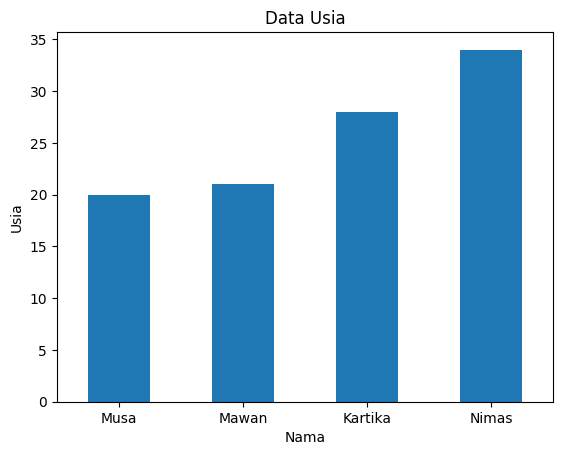

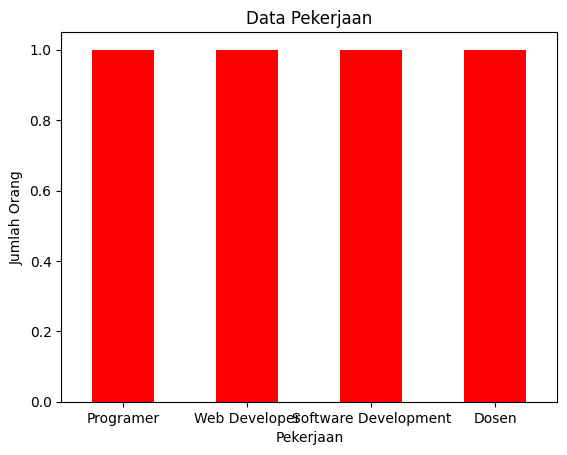

In [14]:
# 4
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Musa", "Mawan", "Kartika", "Nimas"], "Usia": [20, 21, 28, 34]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Musa", "Mawan", "Kartika", "Nimas"], "Pekerjaan": ["Programer", "Web Developer", "Software Development", "Dosen"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

data_pekerjaan= df_joined['Pekerjaan'].value_counts()

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data usia
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.title('Data Usia')
plt.xlabel('Nama')
plt.ylabel('Usia')
plt.xticks(ticks=range(len(df_pandas)), labels=df_pandas['Nama'], rotation=0)
plt.show()

#Plotting data pekerjaan
data_pekerjaan.plot(kind='bar', color='Red')
plt.title('Data Pekerjaan')
plt.xlabel('Pekerjaan')
plt.ylabel('Jumlah Orang')
plt.xticks(rotation=0)
plt.show()

In [15]:
# 5
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_spark_from_pandas.show()
print(df_pandas_from_spark)

#Menggagubangkan DataFrame
df_combined_pandas = pd.merge(df_pandas_from_spark, df_pandas, on="Nama", how="left")

df_combined_spark = spark.createDataFrame(df_combined_pandas)

#Menampilkan data gabungan
print()
print("Penggabungan data Pyspark dan Pandas:")
df_combined_spark.show()

#Menghitung rata-rata usia
avg_usia = df_pandas_from_spark['Usia'].mean()
print(f"Rata-rata usia: {avg_usia}")


+-------+----+
|   Nama|Usia|
+-------+----+
|   Musa|  20|
|  Mawan|  21|
|Kartika|  28|
|  Nimas|  34|
+-------+----+

      Nama  Usia             Pekerjaan      Hobi Gender
0     Musa    20             Programer     Silat      L
1    Mawan    21         Web Developer  Billiard      L
2  Kartika    28  Software Development    Renang      P
3    Nimas    34                 Dosen   Melukis      P

Penggabungan data Pyspark dan Pandas:
+-------+------+--------------------+--------+------+------+
|   Nama|Usia_x|           Pekerjaan|    Hobi|Gender|Usia_y|
+-------+------+--------------------+--------+------+------+
|   Musa|    20|           Programer|   Silat|     L|    20|
|  Mawan|    21|       Web Developer|Billiard|     L|    21|
|Kartika|    28|Software Development|  Renang|     P|    28|
|  Nimas|    34|               Dosen| Melukis|     P|    34|
+-------+------+--------------------+--------+------+------+

Rata-rata usia: 25.75


In [16]:
# 6
# Mengonversi DataFrame dari PySpark ke Pandas
df_pandas_from_spark = df.toPandas()

# Mengonversi DataFrame dari Pandas ke PySpark
df_spark_from_pandas = spark.createDataFrame(df_pandas)

# Menampilkan DataFrame hasil konversi
df_spark_from_pandas.show()
print(df_pandas_from_spark)

#Menggagubangkan DataFrame
df_combined_pandas = pd.merge(df_pandas_from_spark, df_pandas, on="Nama", how="left")

df_combined_spark = spark.createDataFrame(df_combined_pandas)

#Menampilkan data gabungan
print()
print("Gabungan data dari pandas dan spark:")
df_combined_spark.show()

# Menghitung nilai maksimum dari kolom "Usia"
max_usia = df_pandas_from_spark["Usia"].max()
print(f"Nilai maksimum usia: {max_usia}")

+-------+----+
|   Nama|Usia|
+-------+----+
|   Musa|  20|
|  Mawan|  21|
|Kartika|  28|
|  Nimas|  34|
+-------+----+

      Nama  Usia             Pekerjaan      Hobi Gender
0     Musa    20             Programer     Silat      L
1    Mawan    21         Web Developer  Billiard      L
2  Kartika    28  Software Development    Renang      P
3    Nimas    34                 Dosen   Melukis      P

Gabungan data dari pandas dan spark:
+-------+------+--------------------+--------+------+------+
|   Nama|Usia_x|           Pekerjaan|    Hobi|Gender|Usia_y|
+-------+------+--------------------+--------+------+------+
|   Musa|    20|           Programer|   Silat|     L|    20|
|  Mawan|    21|       Web Developer|Billiard|     L|    21|
|Kartika|    28|Software Development|  Renang|     P|    28|
|  Nimas|    34|               Dosen| Melukis|     P|    34|
+-------+------+--------------------+--------+------+------+

Nilai maksimum usia: 34
